In [25]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import IFrame
import folium
from ipyleaflet import Map, Polyline
from ipyleaflet import Map, Polyline, Marker

In [5]:
g = ox.graph_from_file("Cities Data/NewDelhi.osm")

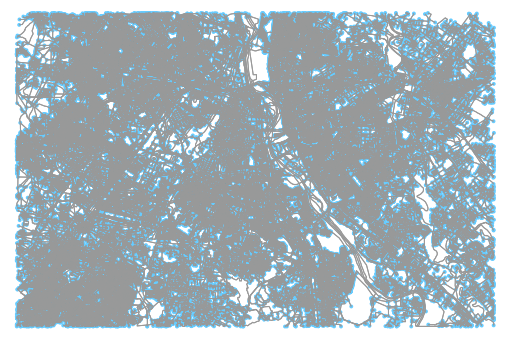

In [7]:
fig, ax = ox.plot_graph(g)

In [10]:
fig.set_size_inches(18.5, 10.5, forward=True)

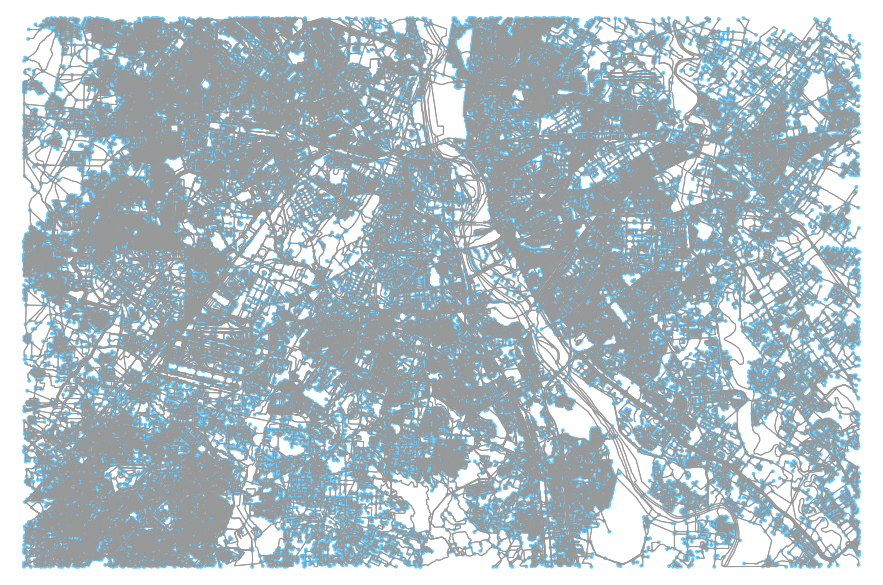

In [11]:
fig

In [68]:
ox.save_graphml(g, filename='delhi.graphml')

In [2]:
g = ox.load_graphml('delhi.graphml')

In [30]:
g.node()

In [33]:
# define origin/desination points then get the nodes nearest to each
origin_point = (28.58208, 77.19404)
destination_point = (28.5921, 77.0460)
origin_node = ox.get_nearest_node(g, origin_point)
destination_node = ox.get_nearest_node(g, destination_point)
origin_node, destination_node

(910450567, 427823033)

In [34]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(g, origin_node, destination_node, weight='length')
str(route)

'[910450567, 910451439, 910451134, 910450623, 910451382, 910451029, 910450784, 910450869, 910451546, 910450609, 915291996, 1870091891, 1870091890, 1986129921, 3735998834, 1681456745, 1319768947, 5766333280, 915290811, 1825530322, 1986129782, 1986129821, 6094558696, 1986129819, 6094558702, 1986129846, 632049755, 4231757299, 4930240988, 1986129714, 4930240981, 2056802169, 427834340, 3862391919, 4231378083, 427834307, 4231620864, 4231620869, 4231620871, 4231620876, 2694691207, 3739100221, 4231620870, 4231620872, 4231620873, 4231620875, 4231620877, 4231620878, 4231620879, 4230177890, 3739104331, 4230177891, 4230177894, 4230177895, 4230177893, 4230177892, 4230177896, 4230177897, 4231620880, 4230179312, 4230177898, 4230177899, 4230161341, 4230177903, 4231697981, 3739104348, 4229979298, 4231655041, 4229998868, 4229979299, 4229998871, 4231622116, 3739104358, 3739104355, 1801101574, 1801101576, 1801101554, 602466767, 602466611, 418813007, 2841455785, 1986129601, 2841691014, 422261434, 422261432

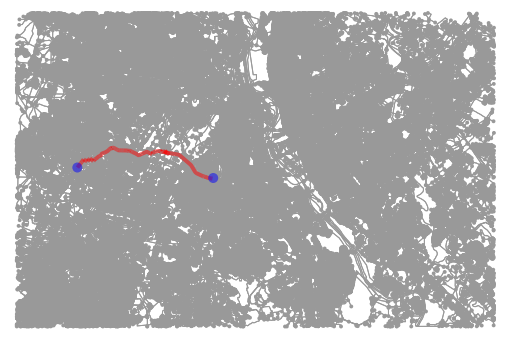

In [19]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(g, route, origin_point=origin_point, destination_point=destination_point)

In [32]:
len(g.nodes())

189050

In [12]:
g.node[2000646629]['x'], g.node[2000646629]['y']

(77.0462685, 28.5922264)

In [35]:
road = []
for i in route:
    road.append([g.node[i]['y'], g.node[i]['x']])

In [49]:
road[:2]

[[28.5814653, 77.1931822], [28.5815326, 77.1927617]]

In [45]:
center = tuple(road[int(len(road)/2)])

In [60]:
so = tuple(road[0])

In [69]:
target = tuple(road[-1])

In [71]:
line = Polyline(
    locations = road,
    color = "green" ,
    )
m = Map(center = center, zoom =12)
marker = Marker(location=target, draggable=False, title='Dwarka')
m.add_layer(marker);
marker = Marker(location= so, draggable=False, title='Sarojini Market')
m.add_layer(marker);
m.add_layer(line)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Graphml File for Bangalore

In [79]:
ban = ox.graph_from_place('Bangalore, Karnataka, India', network_type='drive')

In [80]:
ox.save_graphml(ban, filename='bangalore.graphml')

In [81]:
b = ox.load_graphml('bangalore.graphml')

In [82]:
# define origin/desination points then get the nodes nearest to each
origin_point = (12.933280, 77.611680)
destination_point = (12.992300, 77.567790)
origin_node = ox.get_nearest_node(b, origin_point)
destination_node = ox.get_nearest_node(b, destination_point)
origin_node, destination_node

(1472269388, 976534309)

In [84]:
route = nx.shortest_path(b, origin_node, destination_node, weight='length')
str(route)

'[1472269388, 1472269389, 306589874, 306590603, 4969383827, 4969383835, 4969383777, 5346743924, 5346743606, 2227864898, 2227895711, 2227895715, 2227864919, 2227864988, 2227865004, 2227865016, 2227865024, 308923504, 249099378, 2227895744, 249100607, 2227928151, 459820594, 459820558, 249099486, 459820554, 459820552, 1837395725, 303975877, 1837395726, 459820549, 459820550, 249098541, 304056953, 249100722, 249098540, 1276378492, 249098539, 2227928312, 2227928331, 249100766, 1837395794, 428457173, 249098535, 249134640, 4107785647, 1276378495, 4148802350, 4148802351, 1285102564, 1859880618, 1859880622, 1859880629, 1859880632, 249134829, 1859880635, 1859880638, 1859880642, 1859880646, 1859880648, 1859880650, 1836940335, 694161450, 249135831, 1599997460, 1210353360, 62067292, 429230950, 249137814, 1836983534, 249137627, 320644590, 249087933, 249087934, 456181519, 456181521, 429001084, 456181526, 429231105, 429001178, 456181497, 429001085, 429231022, 429231029, 429231061, 429231020, 429231071, 

In [85]:
road = []
for i in route:
    road.append([b.node[i]['y'], b.node[i]['x']])

In [86]:
center = tuple(road[int(len(road)/2)])
so = tuple(road[0])
target = tuple(road[-1])

In [87]:
line = Polyline(
    locations = road,
    color = "green" ,
    )
m = Map(center = center, zoom =12)
marker = Marker(location=target, draggable=False, title='Dwarka')
m.add_layer(marker);
marker = Marker(location= so, draggable=False, title='Sarojini Market')
m.add_layer(marker);
m.add_layer(line)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [26]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: OK
